<a href="https://colab.research.google.com/github/DeepthiManthapuram/MachineLearning-Algorithms/blob/main/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/heart.csv")

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [42]:
df.shape

(1023, 14)

In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
#handling missing values
df.dropna(inplace = True)



In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include = ['object']).columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le

In [19]:
x = df.drop(columns = ['target'])
y = df['target']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [36]:
#train SVM with linear kernel
from sklearn.svm import SVC

svm_linear = SVC(kernel = 'linear', C=1)
svm_linear.fit(x_train,y_train)
y_pred_linear = svm_linear.predict(x_test)

In [47]:
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(x_train, y_train)
y_pred_poly = svm_poly.predict(x_test)


In [28]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_linear)
print("Accuracy:",accuracy)



Accuracy: 0.8341463414634146


In [29]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred_linear)
print("Confusion Matrix:")
print(confusion)





Confusion Matrix:
[[79 25]
 [ 9 92]]


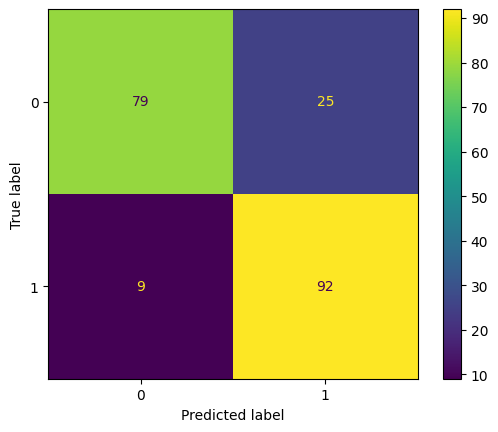

In [33]:
import matplotlib.pyplot as plt

#dispaly confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=svm_linear.classes_)
disp.plot()
plt.show()

In [31]:
#train SVM with polynomial kernel
from sklearn.svm import SVC

svm_poly = SVC(kernel = 'poly', degree = 3, C=1)
svm_poly.fit(x_train,y_train)
y_pred_poly = svm_poly.predict(x_test)

In [32]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_poly)
print("Accuracy:",accuracy)



Accuracy: 0.9121951219512195


In [35]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred_poly)
print("Confusion Matrix:")
print(confusion)





Confusion Matrix:
[[90 14]
 [ 4 97]]


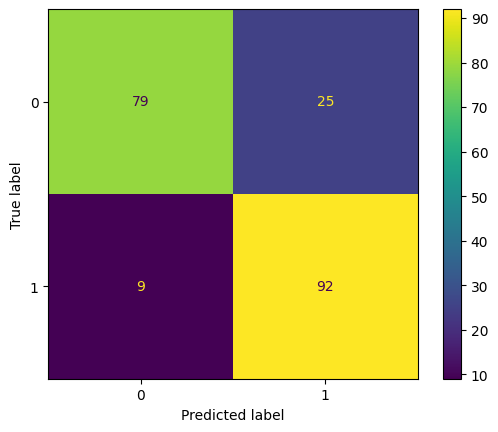

In [34]:
import matplotlib.pyplot as plt

#dispaly confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=svm_poly.classes_)
disp.plot()
plt.show()

In [38]:
#train SVM with RBF kernel

from sklearn.svm import SVC

svm_rbf = SVC(kernel = 'rbf', C=1, gamma = 'scale')
svm_rbf.fit(x_train,y_train)
y_pred_rbf = svm_rbf.predict(x_test)

In [39]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_rbf)
print("Accuracy:",accuracy)



Accuracy: 0.9170731707317074


In [41]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred_rbf)
print("Confusion Matrix:")
print(confusion)





Confusion Matrix:
[[92 12]
 [ 5 96]]


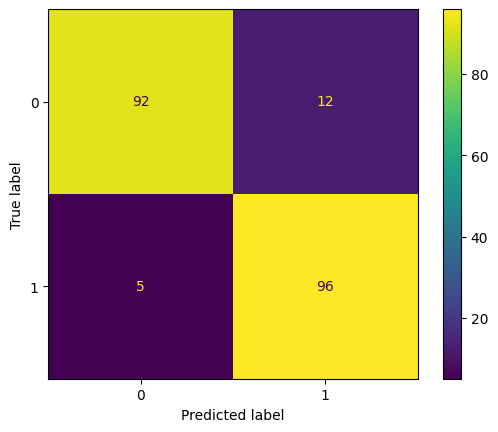

In [45]:
import matplotlib.pyplot as plt

#dispaly confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=svm_rbf.classes_)
disp.plot()
plt.show()